# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise 1 for Archaeology of Scotland

#### Made by Rachel Opitz, Archaeology, University of Glasgow



Archaeologists regularly work with maps and data about where sites, samples and objects are found. We ask lots of questions that have a spatial component. Which Bronze Age cairns are close to the coast in England? In this excavation, is bone found inside a building or outside in the yard? It's important to learn to work with spatial data and maps in order to succeed in a variety of careers in archaeology and heritage management.

To start working with spatial data and maps, you need to put together your toolkit. You're currently working inside something called a jupyter notebook. It's a place to keep notes, pictures, code and maps together. You can add tools and data into your jupyter notebook and then use them to ask spatial questions and make maps and visualisations that help answer those questions. 

The aim of this exercise is for you to:
* learn to make very simple static maps
* learn to ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 

### Let's get started... Hit 'Ctrl'+'Enter' to run the code in any cell in the page.

![The map that came to life](https://c1.staticflickr.com/4/3017/2863068137_055aef279a_b.jpg)

### We'll start by adding some of the tools we will need. They're not quite like these tools...

![They're not quite like these tools...](http://www.truelles-pixels.mom.fr/english/episode01/knowmore_files/outils.jpg)

In [8]:
%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!

import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets
import bokeh

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity.


# Remember to hit Ctrl+Enter to make things happen!

### Now that we have the basic tools loaded up we need some data. This data is from the Gabii Project, an excavation of a town that was a rival to Rome early on and then became part of the emerging Roman Empire.

In [9]:
url = 'https://raw.githubusercontent.com/ropitz/spatialarchaeology/master/data/gabii_areaB_published2.geojson'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
request = requests.get(url)
# Please get me the data at that web address (url)
b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gabii_areaB = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gabii_areaB.head())
# I will use the fiona tool to wrap up all the data from 'b', check the coordinate system (crs) listed in the features
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



  DESCRIPTIO  OBJECTID  SHAPE_Area  SHAPE_Leng    SU  \
0        DEP     26685   11.969015   26.189290  1306   
1        TOP     26686   14.923002   47.756334  1322   
2        DEP     26720    9.796683   18.366685  1340   
3        DEP     26723   67.846039   39.322690  1327   
4         OT     26729    0.105872    1.304155  1338   

                    definition  \
0   rubble layer along bedrock   
1  Cut filled by 1306 and 1279   
2           Soil abutting 1320   
3           Soil below SU 1325   
4     Vessels of Infant Burial   

                                          finds_note               formation  \
0  Buccheroid impasto: incised decoration on one ...            Accumulation   
1                                               None                 Cutting   
2  Overpainted ware: one has black lozenge patter...            Accumulation   
3  Black gloss: includes some pieces that join. C...            Accumulation   
4  The dating is based on the two vessels that ar...  Inte

### Does that look right? 

You should have geometry information about polygons (shapes) of the contexts from area B and a bunch of descriptions and interpretation of the archaeology. Importatly you should be able to spot the column names: Descriptio, objectid, shape_area, shape_leng, SU, definition, finds_note, formation, geometry, interpret. Each column contains a different type of information. Note that SU (stratigraphic unit) = context.

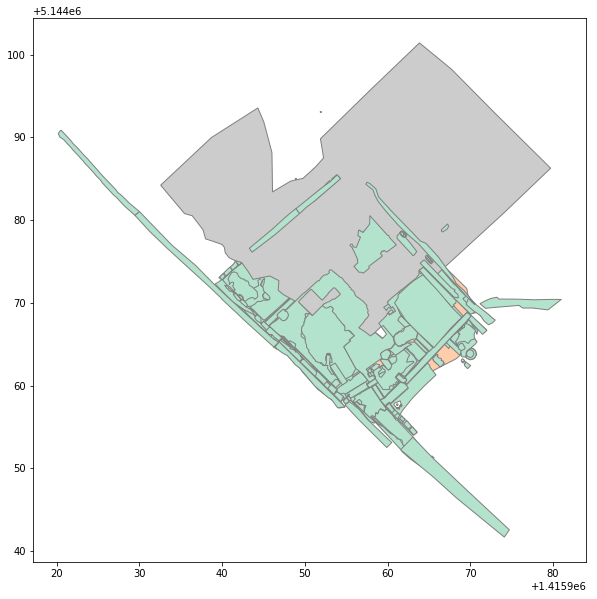

In [14]:
# Let's visualise the data to double check that all is well

gabii_map1 = gabii_areaB.plot(column='SHAPE_Area', cmap='Pastel2', edgecolor='grey', figsize=(10, 10));
# 'plot' means draw me an image showing the geometry of each feature in my data. 
# We want to control things like the color of the individual features on our map. 
# I used the pastel colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on their size.


### Well done! You just made your first archaeological map. It shows all the contexts in area B at Gabii. 

This is good, but what if you only want to look at one kind of context? We can select specific types of contexts from within our dataset by searching (aka querying) for them. 

How do we know what kind of contexts we have? Looking at what's inside the data describing all those polygon shapes on the map should help. 

Start by printing out our data in a tidy way. Just type its name...

In [15]:
gabii_areaB

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
0,DEP,26685,11.969015,26.189290,1306,rubble layer along bedrock,Buccheroid impasto: incised decoration on one ...,Accumulation,POLYGON Z ((1415955.360385462 5144086.46841169...,not excavated in 2010
1,TOP,26686,14.923002,47.756334,1322,Cut filled by 1306 and 1279,None,Cutting,POLYGON Z ((1415955.132051097 5144087.07598129...,Conspicuous erosion along northern edges. Cut ...
2,DEP,26720,9.796683,18.366685,1340,Soil abutting 1320,Overpainted ware: one has black lozenge patter...,Accumulation,POLYGON Z ((1415953.137324729 5144060.26186240...,Big patch of tufo inclusions (rubble) in cente...
3,DEP,26723,67.846039,39.322690,1327,Soil below SU 1325,Black gloss: includes some pieces that join. C...,Accumulation,POLYGON Z ((1415956.165272974 5144066.02788641...,"dry, sunny conditions; excavated with trowel a..."
4,OT,26729,0.105872,1.304155,1338,Vessels of Infant Burial,The dating is based on the two vessels that ar...,Intentional Deposition,POLYGON Z ((1415955.13446102 5144078.257591849...,found at bottom of fill of cut which was excav...
5,BOT,26738,0.156413,1.487500,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.086285916 5144078.55687556...,None
6,TOP,26739,0.264979,1.915394,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.004336904 5144078.63198564...,None
7,DEP,26820,1.303537,6.084845,1198,Crushed tufo floor in room 6 (top),None,Construction,POLYGON Z ((1415954.751427361 5144082.37077248...,Entrie floor not left. Cut on all sides and ab...
8,DEP,26822,2.384225,6.618940,1300,layer of preparation for tufo floor 1198,small fragments,Construction,POLYGON Z ((1415954.955879129 5144082.46227852...,"hot, dry conditions, not excavated in 2010. Ex..."
9,DEP,26823,14.953441,15.311027,1320,Yellowish layer with disturbance,Thin-walled ware: one sherd with barbotine. Pa...,Accumulation,POLYGON Z ((1415956.362272437 5144059.22833042...,Special finds: votive vassel and iron plate


In archaeology we often talk about how contexts get created. This is referred to as their 'formation process' - how they get formed. We will describe different formation processes as deposits, cuts, fills, constructions, etc. Look at the 'formation' column in the table, and you'll see these terms in many of the entries.

In [16]:
# Say you only want to look at the contexts formed by cutting a.k.a. 'Cuts'. Pandas use square brackets [] to make selections. 
# Here we select all the rows (.loc) where the column 'formation' has the value 'cutting'. == means 'this thing is true' in code

gabii_areaB.loc[gabii_areaB['formation'] == 'Cutting']

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
1,TOP,26686,14.923002,47.756334,1322,Cut filled by 1306 and 1279,None,Cutting,POLYGON Z ((1415955.132051097 5144087.07598129...,Conspicuous erosion along northern edges. Cut ...
5,BOT,26738,0.156413,1.487500,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.086285916 5144078.55687556...,None
6,TOP,26739,0.264979,1.915394,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.004336904 5144078.63198564...,None
11,BOT,26888,9.771116,47.023217,1322,Cut filled by 1306 and 1279,None,Cutting,(POLYGON Z ((1415954.164650016 5144085.5552630...,Conspicuous erosion along northern edges. Cut ...
26,TOP,27765,1.487252,5.299752,1191,cut filled with 1190,None,Cutting,POLYGON Z ((1415958.24653589 5144071.081731626...,Cuts the tufo floor of room 2.
27,BOT,27780,2.093675,7.437690,1171,cut for trench built wall 1163,None,Cutting,POLYGON Z ((1415954.446054083 5144073.08712573...,soil around wall previously excavated; cut not...
31,TOP,27827,2.549138,9.285737,1170,ditch for rubble wall 1135,None,Cutting,POLYGON Z ((1415950.94163051 5144069.896884006...,soil of cut on S side was removed during excav...
32,BOT,27828,2.088437,8.619827,1170,ditch for rubble wall 1135,None,Cutting,POLYGON Z ((1415950.294921424 5144070.05603515...,soil of cut on S side was removed during excav...
36,BOT,27849,1.952517,10.841751,1175,cut of fill SU 1174,None,Cutting,POLYGON Z ((1415946.788034801 5144066.11807546...,the cut becomes irregular about 5 meters from ...
37,TOP,27850,3.767154,11.101317,1175,cut of fill SU 1174,None,Cutting,POLYGON Z ((1415946.529643138 5144066.14336448...,the cut becomes irregular about 5 meters from ...


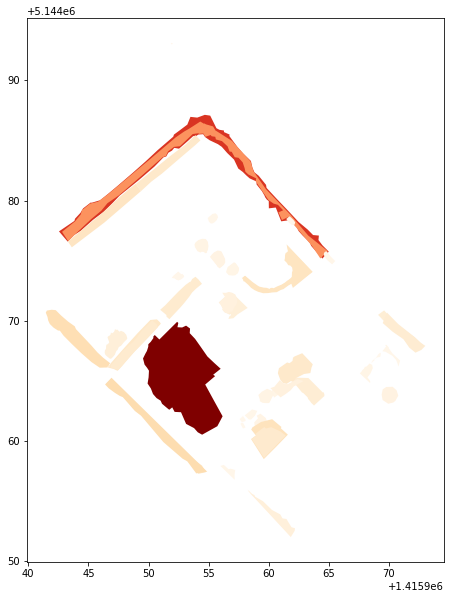

In [17]:
# If we want to see this result as a map, we just add the .plot command to the end.

gabii_areaB.loc[gabii_areaB['formation'] == 'Cutting'].plot(column='SHAPE_Area', cmap='OrRd', figsize=(10, 10))

In [18]:
# Try and do the same thing for contexts that are construction type features
gabii_areaB.loc[gabii_areaB['formation'] == 'Construction']

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
7,DEP,26820,1.303537,6.084845,1198,Crushed tufo floor in room 6 (top),None,Construction,POLYGON Z ((1415954.751427361 5144082.37077248...,Entrie floor not left. Cut on all sides and ab...
8,DEP,26822,2.384225,6.618940,1300,layer of preparation for tufo floor 1198,small fragments,Construction,POLYGON Z ((1415954.955879129 5144082.46227852...,"hot, dry conditions, not excavated in 2010. Ex..."
12,WL,27006,2.333639,9.256114,1135,rubble wall - perpendicular to 1058 - west to ...,impasto: 1 piece with rosette pattern > not sp...,Construction,POLYGON Z ((1415946.69014102 5144066.080989177...,The rubble wall labeled 1135 is approximately ...
13,WL,27007,2.727138,11.571806,1162,perpendicular continuation of rubble wall 1135,None,Construction,POLYGON Z ((1415951.310237083 5144061.84576435...,"runs parallel to 1058, but relationship betwee..."
16,WL,27011,1.630438,6.682819,1163,rubble wall continuation of 1135,black gloss: small than a finger iron_nail; ir...,Construction,POLYGON Z ((1415951.657487767 5144070.37384339...,1163 is a continuation of the rubble wall 1135...
17,WL,27615,4.501958,21.260326,363,N-S wall,None,Construction,POLYGON Z ((1415920.557157218 5144090.87363644...,Wall continues through Area B (SU1058)
21,FL,27746,0.962504,5.838136,1178,cocciopesto layer in room 1,cocciopesto: 3 samples of the floor,Construction,POLYGON Z ((1415960.496727411 5144074.92932627...,"SU was visible are removal of SU 1016, excavat..."
61,DEP,28016,0.690137,4.184486,1206,Bigger stones below wall SU 1181,None,Construction,POLYGON Z ((1415962.203610134 5144072.95532428...,Stones left in situ
65,WL,28022,0.330448,2.239751,1184,Southern wall of ashlar blocks of a room in th...,None,Construction,POLYGON Z ((1415962.932851195 5144073.36261506...,Where the wall abuts the western wall SU 1183 ...
66,WL,28023,0.282768,2.083348,1184,Southern wall of ashlar blocks of a room in th...,None,Construction,POLYGON Z ((1415962.209377744 5144072.74769228...,Where the wall abuts the western wall SU 1183 ...


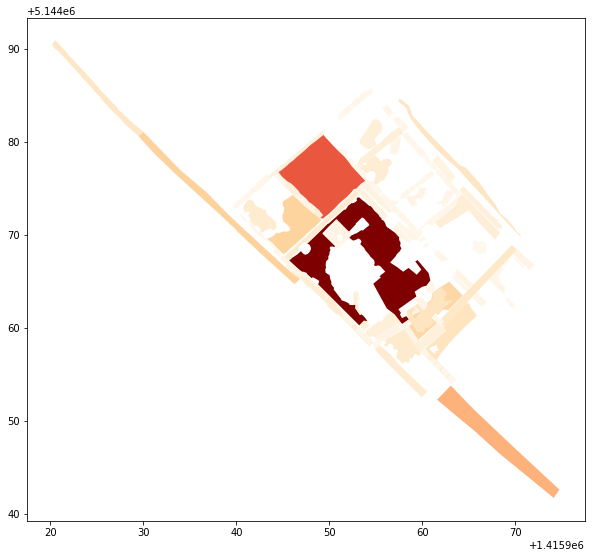

In [19]:
# Remember to draw it as a map!
gabii_areaB.loc[gabii_areaB['formation'] == 'Construction'].plot(column='SHAPE_Area', cmap='OrRd', figsize=(10, 10))

In [21]:
# Let's save these selections of 'constructions' and 'cuts' so we can use them again.
# I've given them names here. These are now 'named variables'
gabii_areaB_constructions = gabii_areaB.loc[gabii_areaB['formation'] == 'Construction']
gabii_areaB_cuts = gabii_areaB.loc[gabii_areaB['formation'] == 'Cutting']

In [22]:
#Test your named variable by printing it out again, calling it by its name.
gabii_areaB_cuts

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
1,TOP,26686,14.923002,47.756334,1322,Cut filled by 1306 and 1279,None,Cutting,POLYGON Z ((1415955.132051097 5144087.07598129...,Conspicuous erosion along northern edges. Cut ...
5,BOT,26738,0.156413,1.487500,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.086285916 5144078.55687556...,None
6,TOP,26739,0.264979,1.915394,1350,Cut for infant burial Cassandra,None,Cutting,POLYGON Z ((1415955.004336904 5144078.63198564...,None
11,BOT,26888,9.771116,47.023217,1322,Cut filled by 1306 and 1279,None,Cutting,(POLYGON Z ((1415954.164650016 5144085.5552630...,Conspicuous erosion along northern edges. Cut ...
26,TOP,27765,1.487252,5.299752,1191,cut filled with 1190,None,Cutting,POLYGON Z ((1415958.24653589 5144071.081731626...,Cuts the tufo floor of room 2.
27,BOT,27780,2.093675,7.437690,1171,cut for trench built wall 1163,None,Cutting,POLYGON Z ((1415954.446054083 5144073.08712573...,soil around wall previously excavated; cut not...
31,TOP,27827,2.549138,9.285737,1170,ditch for rubble wall 1135,None,Cutting,POLYGON Z ((1415950.94163051 5144069.896884006...,soil of cut on S side was removed during excav...
32,BOT,27828,2.088437,8.619827,1170,ditch for rubble wall 1135,None,Cutting,POLYGON Z ((1415950.294921424 5144070.05603515...,soil of cut on S side was removed during excav...
36,BOT,27849,1.952517,10.841751,1175,cut of fill SU 1174,None,Cutting,POLYGON Z ((1415946.788034801 5144066.11807546...,the cut becomes irregular about 5 meters from ...
37,TOP,27850,3.767154,11.101317,1175,cut of fill SU 1174,None,Cutting,POLYGON Z ((1415946.529643138 5144066.14336448...,the cut becomes irregular about 5 meters from ...


So far these searches have been about the attributes of our data. Attributes are information that desribes the pologyons We can also ask questions about spatial relationships or real-world location. First, let's find the bounding box, or real world location and extents of our data. These are the smallest and largest coordinates on the x- and y- axes in the real world. We use the command 'total_bounds' to ask this question. Things 'in bounds' are inside the box.

In [23]:
gabii_areaB_cuts.total_bounds

array([1415941.45752799, 5144052.02133839, 1415973.02014723,
       5144093.12432734])

In [24]:
# Now do the same thing for the constructions. The results should be similar, but not identical.
gabii_areaB_constructions.total_bounds

array([1415920.20308415, 5144041.69753804, 1415974.72500843,
       5144090.87363645])

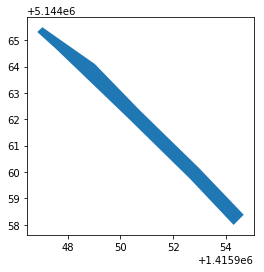

In [25]:
#Now we will select a single context, SU 5018, a nice wall.
gabii_areaB_5018 = gabii_areaB_constructions.loc[gabii_areaB_constructions['SU'] == 5018]
gabii_areaB_5018
gabii_areaB_5018.plot()

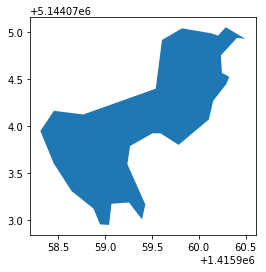

In [26]:
#Now we will select another single context, SU 1178, a nice floor surface. Ok, an oddly shaped floor surface.
gabii_areaB_1178 = gabii_areaB_constructions.loc[gabii_areaB_constructions['SU'] == 1178]
gabii_areaB_1178
gabii_areaB_1178.plot()

### Why might our floor surface have such a funny shape? One reason might be if later cuts were made through the floor.
 
Maybe someone was digging a pit or a grave. We can check. 

In [28]:
# We use the '.overlay' command to see which contexts from the 'cuts' dataset intersect the floor context# 1178
gpd.overlay(gabii_areaB_1178, gabii_areaB_cuts, how='intersection')

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,interpret_,DESCRIPTIO_2,OBJECTID_2,SHAPE_Area_2,SHAPE_Leng_2,SU_2,definition_2,finds_note_2,formation_2,interpret__2,geometry
0,FL,27746,0.962504,5.838136,1178,cocciopesto layer in room 1,cocciopesto: 3 samples of the floor,Construction,"SU was visible are removal of SU 1016, excavat...",TOP,27942,2.970537,13.749318,1235,Semi-circular cut into bedrock,None,Cutting,See also photos d0189-0197,POLYGON Z ((1415959.045282087 5144072.96082335...
1,FL,27746,0.962504,5.838136,1178,cocciopesto layer in room 1,cocciopesto: 3 samples of the floor,Construction,"SU was visible are removal of SU 1016, excavat...",TOP,27942,2.970537,13.749318,1235,Semi-circular cut into bedrock,None,Cutting,See also photos d0189-0197,POLYGON Z ((1415958.969816703 5144072.94870080...


Your results should show one context - 1178 that is a cut that has a spatial relationship with the floor.

#### Is the cut the reason for the funny shaped floor?

We can make a map showing their relationship spatially. 

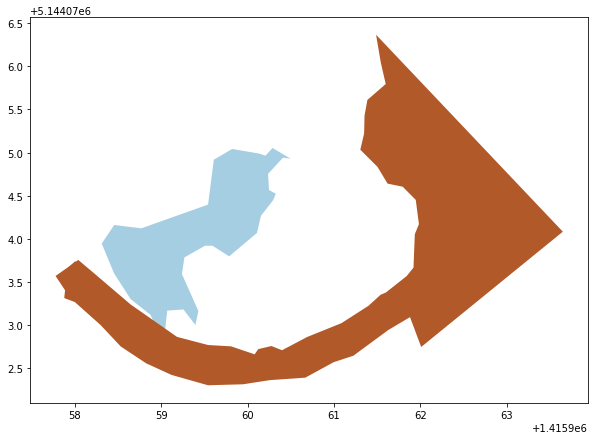

In [29]:
# To do this we have to provide a list of the values we are interested in seeing on the map, in square brackets []
gabii_areaB.loc[gabii_areaB['SU'].isin([1178,1235])].plot(column='SU', cmap='Paired', figsize=(10, 10))

What does this map suggest? I'd say there is another reason for the funny shape of the floor. It is just barely cut by the context 1178.

#### Now we might ask a more complicated question, and look at all the places where cuts have been made into constructions. This is a good way to assess damage to built features at an archaeological site. To do this, we need to ask where cuts and constructions intersect.

In [30]:
# Start by printing out the list of all the polygons that represent places where cuts and constructions intersect. 
gpd.overlay(gabii_areaB_constructions, gabii_areaB_cuts, how='intersection', use_sindex=True)

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,interpret_,DESCRIPTIO_2,OBJECTID_2,SHAPE_Area_2,SHAPE_Leng_2,SU_2,definition_2,finds_note_2,formation_2,interpret__2,geometry
0,WM,29120,13.888185,26.612407,1228,Square channel,None,Construction,Channel was detected at the very southwestern ...,TOP,28637,1.222815,8.459633,1407,"construction cut for wall 1058, construction c...",None,Cutting,"dry, sunny conditions",POLYGON Z ((1415961.841858818 5144052.03302901...
1,PV,28631,3.894729,10.134219,1400,ambitus Via Claudia,None,Construction,"dry, sunny conditions; good visibility",TOP,28638,0.292612,2.892374,1407,"construction cut for wall 1058, construction c...",None,Cutting,"dry, sunny conditions",POLYGON Z ((1415956.033817526 5144057.95755098...
2,DEP,28803,7.941859,15.723103,1443,Soil below tufo floor 1417,None,Construction,Hot dry day for excavation; use pickaxe to exc...,BOT,28835,2.160202,6.037617,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.078480494 5144059.41404110...
3,DEP,28803,7.941859,15.723103,1443,Soil below tufo floor 1417,None,Construction,Hot dry day for excavation; use pickaxe to exc...,BOT,28835,2.160202,6.037617,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.582646655 5144058.72144768...
4,WL,28635,2.572140,12.341321,1391,Western wall of room 6,None,Construction,None,BOT,28835,2.160202,6.037617,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.582646655 5144058.72144768...
5,WL,28635,2.572140,12.341321,1391,Western wall of room 6,None,Construction,None,TOP,28834,3.188242,7.345028,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.646192197 5144058.63415261...
6,WL,28832,1.989445,6.896190,1415,Continuation of wall,None,Construction,Exposed in phases with excavations around wall...,TOP,28834,3.188242,7.345028,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.944362879 5144058.86269253...
7,DEP,28803,7.941859,15.723103,1443,Soil below tufo floor 1417,None,Construction,Hot dry day for excavation; use pickaxe to exc...,TOP,28834,3.188242,7.345028,1451,Cut filled by 1443,None,Cutting,"Pickaxed fill 1443, noticed more compaction on...",POLYGON Z ((1415959.078480494 5144059.41404110...
8,WL,29267,2.977730,16.173492,5018,Wall,None,Construction,"After opening trench F, the extent of this wal...",BOT,29299,2.929707,17.209129,5017,Construction Cut of wall 5018,None,Cutting,Excavated on dry sunny day with good visibility,POLYGON Z ((1415954.03035087 5144058.272187925...
9,WL,29267,2.977730,16.173492,5018,Wall,None,Construction,"After opening trench F, the extent of this wal...",TOP,29300,3.964200,17.520993,5017,Construction Cut of wall 5018,None,Cutting,Excavated on dry sunny day with good visibility,POLYGON Z ((1415954.129877758 5144058.20023567...


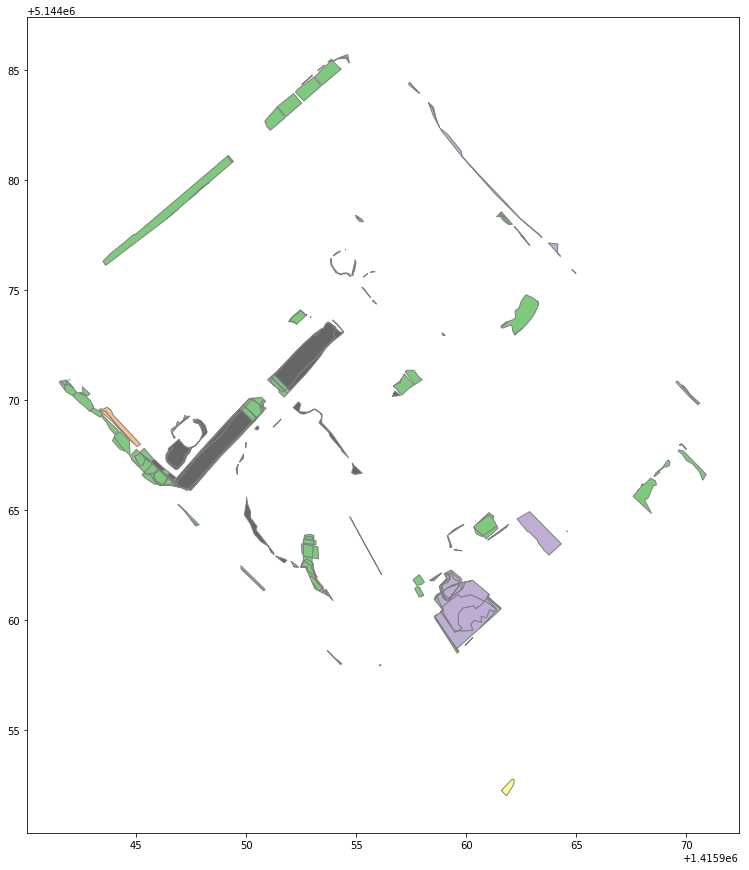

In [32]:
#Now draw all the places our construction features intersect with cuts. Our site is like swiss cheese. 
gpd.overlay(gabii_areaB_constructions, gabii_areaB_cuts, how='intersection').plot(column='SHAPE_Area', cmap='Accent', edgecolor='grey', figsize=(15, 15))
#You'll notice I picked a differnt colour map this time, and made the figure a bit larger.

### Now try another question. What if we wanted to find all the contexts defined as soil layers? 

'Soils' isn't one of our formations, so we must look elsewhere in our data. Looking at the definitions above, soil is mentioned under the 'definition' column sometimes but it's not the only word in that entry. For example, an entry might read 'Soil below tufo floor 1417'. So we need to look inside the 'definition' entry and search for the word 'soil'. We do this by calling every entry (value) within that column a string 'str' and asking what that string 'contains'. If the word 'soil' appears anywhere, it will match.

In [33]:
gabii_areaB_soil = gabii_areaB[gabii_areaB['definition'].str.contains('soil')]
gabii_areaB_soil

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
15,DEP,27009,33.212918,25.597601,1165,"yellowish, silty soil south",internal red slip ware: traces of burning; ver...,Accumulation,POLYGON Z ((1415959.721522432 5144069.34326370...,dark orange/yellow layer with inclusions of wh...
20,DEP,27745,2.035298,7.541085,1189,soil below 1176,4 fragments and 1 tooth,Intentional Deposition,POLYGON Z ((1415951.183338442 5144071.02319630...,"excavated with pick, trowel when near floor"
28,DEP,27808,26.046921,29.170379,1168,layer containing soil and gravel,painted fineware: 2 rims & 1 wall join to form...,Accumulation,POLYGON Z ((1415949.816533951 5144079.90158797...,delta145 worked bone object
29,DEP,27813,3.862375,15.291481,1182,soil in corridor between SU 1183 and SU 1186,bucchero: fragments of handle projecting from ...,Accumulation,POLYGON Z ((1415959.71354645 5144069.431659473...,The soil fills the corridor that sits between ...
39,DEP,27857,9.766406,13.216866,1205,Brownish soil with stones below 1181,painted fineware: red paint; commonware: cooki...,Accumulation,POLYGON Z ((1415958.991768754 5144074.52719054...,Greco-Italian amphora within layer = pictures ...
54,DEP,27920,1.800504,6.718921,1223,"Silty soil beneath wall 1206 and 1205, in situ",None,Accumulation,POLYGON Z ((1415961.848521495 5144073.59735125...,unexcavated
57,DEP,27938,18.548525,22.117073,1232,Reddish soil abutting 1222,black gloss: 1 piece with stamped decoration (...,Accumulation,POLYGON Z ((1415947.993718861 5144070.33276500...,excavated with pickaxes
129,DEP,28166,8.326232,14.892099,1275,soil above crushed tufo floor 1216 in room 4,2016 edit: one fragment of white plaster.,Accumulation,POLYGON Z ((1415953.800414825 5144075.77394161...,"excavated with pickaxe and trowel on warm, sun..."
190,DEP,28458,16.197288,17.822913,1384,Reddish soil equivalent of 1199,underside of foot has concentric black circles,Accumulation,POLYGON Z ((1415952.553432892 5144062.54727473...,As excavation proceeded it was determined that...
199,DEP,28561,2.447532,8.460253,1401,Tiles and soil cut by 1229,"Black gloss: four rims, one wall, and one base...",Accumulation,POLYGON Z ((1415951.850280398 5144061.56028044...,In approximately the middle of SU 1401 there i...


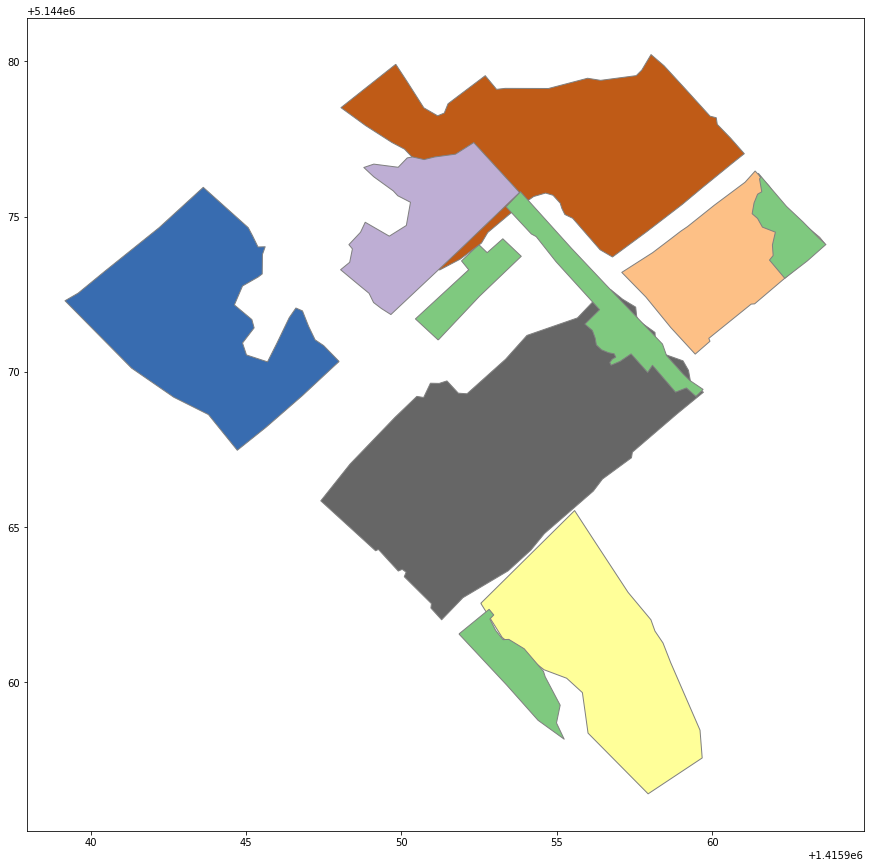

In [34]:
# Now create a map of all the contexts defined as being made of soil.
gabii_areaB_soil.plot(column='SHAPE_Area', cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What if we wanted to know about contexts that were near other contexts? Let's construct a new query.

This time let's look for the contexts that have notable finds and see if they are near our construction contextx

Step 1: define your dataset of contexts that have notable finds. This is everwhere that has text in that field, or is 'not null'.


In [35]:
gabii_areaB_cool_finds = gabii_areaB[gabii_areaB['finds_note'].notnull()]
gabii_areaB_cool_finds

,DESCRIPTIO,OBJECTID,SHAPE_Area,SHAPE_Leng,SU,definition,finds_note,formation,geometry,interpret_
0,DEP,26685,11.969015,26.189290,1306,rubble layer along bedrock,Buccheroid impasto: incised decoration on one ...,Accumulation,POLYGON Z ((1415955.360385462 5144086.46841169...,not excavated in 2010
2,DEP,26720,9.796683,18.366685,1340,Soil abutting 1320,Overpainted ware: one has black lozenge patter...,Accumulation,POLYGON Z ((1415953.137324729 5144060.26186240...,Big patch of tufo inclusions (rubble) in cente...
3,DEP,26723,67.846039,39.322690,1327,Soil below SU 1325,Black gloss: includes some pieces that join. C...,Accumulation,POLYGON Z ((1415956.165272974 5144066.02788641...,"dry, sunny conditions; excavated with trowel a..."
4,OT,26729,0.105872,1.304155,1338,Vessels of Infant Burial,The dating is based on the two vessels that ar...,Intentional Deposition,POLYGON Z ((1415955.13446102 5144078.257591849...,found at bottom of fill of cut which was excav...
8,DEP,26822,2.384225,6.618940,1300,layer of preparation for tufo floor 1198,small fragments,Construction,POLYGON Z ((1415954.955879129 5144082.46227852...,"hot, dry conditions, not excavated in 2010. Ex..."
9,DEP,26823,14.953441,15.311027,1320,Yellowish layer with disturbance,Thin-walled ware: one sherd with barbotine. Pa...,Accumulation,POLYGON Z ((1415956.362272437 5144059.22833042...,Special finds: votive vassel and iron plate
10,DEP,26838,0.898638,4.855048,1321,Wall collapse of SU 1299,Ceramics not sufficiently diagnostic to allow ...,Collapse,POLYGON Z ((1415954.833443121 5144078.99061315...,"Pile of rubble, rocks sized softball to soccer..."
12,WL,27006,2.333639,9.256114,1135,rubble wall - perpendicular to 1058 - west to ...,impasto: 1 piece with rosette pattern > not sp...,Construction,POLYGON Z ((1415946.69014102 5144066.080989177...,The rubble wall labeled 1135 is approximately ...
14,DEP,27008,11.778627,15.621343,1158,surface inside 'room' at S edge of excavation ...,impasto: 1 wall with impressed decoration; imp...,Accumulation,POLYGON Z ((1415959.557487104 5144069.29606340...,An olla (SU 10167) was removed from this SU on...
15,DEP,27009,33.212918,25.597601,1165,"yellowish, silty soil south",internal red slip ware: traces of burning; ver...,Accumulation,POLYGON Z ((1415959.721522432 5144069.34326370...,dark orange/yellow layer with inclusions of wh...


### Let's look for construction features within 2 meters of contexts with our cool finds.

Define a 2m area around all the contexts with cool finds. 2m is pretty close by.

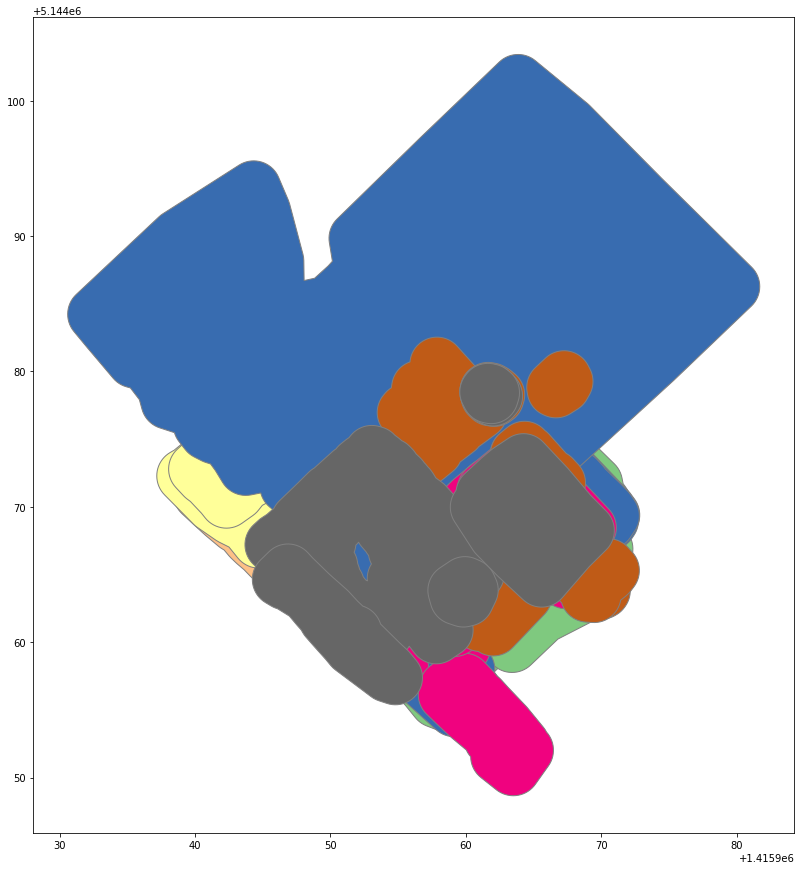

In [39]:
gabii_areaB_cool_finds_2m = gabii_areaB_cool_finds.buffer(2)
gabii_areaB_cool_finds_2m.plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

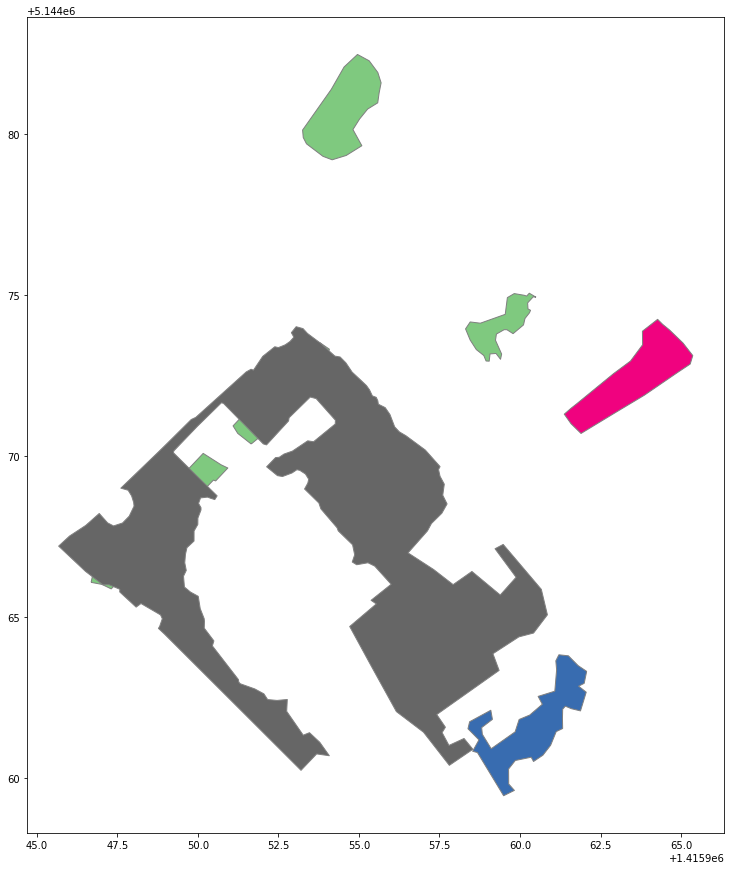

In [41]:
# Now we plot the intersection between the buffered finds polygons and our construction polygons
gabii_areaB_cool_finds_2m.intersection(gabii_areaB_constructions).plot(cmap='Accent', edgecolor='grey', figsize=(15, 15))

### What do we conclude? Not many constructions overlap with contexts with interesting finds in area B at Gabii.

### This ends the tutorial. You can practice writing queries (asking questions of your data) by playing around in this notebook. Try changing values or searching for different types of features or descriptions. You'll be doing this in class during your next practical!

Hopefully you learned to:
* make very simple static maps
* ask simple questions using spatial data. This is sometimes referred to as 'writing queries'.
* start thinking about the importance of spatial relationships and data in archaeology. 
